In [1]:
# accessing google drive
from google.colab import drive
# data processing
import pandas as pd
import numpy as np
# visualization
import plotly.express as px
import plotly.graph_objects as go

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the data using pandas
features = pd.read_csv("/content/drive/MyDrive/KDD Fall23/Lab Datasets/Features-data-set.csv")
sales = pd.read_csv("/content/drive/MyDrive/KDD Fall23/Lab Datasets/sales-data-set.csv")
store_data = pd.read_csv("/content/drive/MyDrive/KDD Fall23/Lab Datasets/stores-data-set.csv")

**Task 1: Which (store, department) pair has the lowest and the highest sales in the first quarter of a year?**

In [4]:
# Converting the 'date' column to datetime objects
sales['Date'] = pd.to_datetime(sales['Date'])
features['Date'] = pd.to_datetime(features['Date'])


<ipython-input-4-2997c2e73822>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])
<ipython-input-4-2997c2e73822>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  features['Date'] = pd.to_datetime(features['Date'])


In [5]:
# Merging or combining the datasets on 'store' and 'Date' columns
merged_data = pd.merge(sales, features, on=['Store', 'Date'])
merged_data3 = pd.merge(merged_data, store_data, on=['Store'])

In [6]:
# Filtering the data to include only the first quarter for the recorded years
years = [2010, 2011, 2012]
first_quarter_data = merged_data[merged_data['Date'].dt.year.isin(years) & (merged_data['Date'].dt.month >= 1) & (merged_data['Date'].dt.month <= 3)]

In [7]:
# Grouping the data by (Store, Dept) and calculate the total sales for each group
sales_by_store_dept = first_quarter_data.groupby(['Store', 'Dept'])['Weekly_Sales'].sum().reset_index()

In [8]:
# Finding the (Store, Dept) pair with the lowest and highest sales
lowest_sales_pair = sales_by_store_dept[sales_by_store_dept['Weekly_Sales'] == sales_by_store_dept['Weekly_Sales'].min()]
highest_sales_pair = sales_by_store_dept[sales_by_store_dept['Weekly_Sales'] == sales_by_store_dept['Weekly_Sales'].max()]

In [9]:
print("Lowest Sales Pair:")
print(lowest_sales_pair)

Lowest Sales Pair:
      Store  Dept  Weekly_Sales
2575     35    47       -3843.5


In [10]:
print("\nHighest Sales Pair:")
print(highest_sales_pair)


Highest Sales Pair:
      Store  Dept  Weekly_Sales
1041     14    92    5874219.16


In [11]:
merged_data3

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


In [12]:
merged_data3.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


**Task 2: What types (A or B or C) of stores have the lowest and the highest sales variance?**

In [13]:
# Grouping the data by store type and calculate the variance of weekly sales for each type
sales_variance_by_type = merged_data3.groupby('Type')['Weekly_Sales'].var().reset_index()

In [14]:
# Getting the store type with the lowest and highest sales variance
lowest_sales_variance_type = sales_variance_by_type[sales_variance_by_type['Weekly_Sales'] == sales_variance_by_type['Weekly_Sales'].min()]
highest_sales_variance_type = sales_variance_by_type[sales_variance_by_type['Weekly_Sales'] == sales_variance_by_type['Weekly_Sales'].max()]

In [15]:
print("Store Type with the Lowest Sales Variance:")
print(lowest_sales_variance_type)

Store Type with the Lowest Sales Variance:
  Type  Weekly_Sales
2    C  2.555315e+08


In [16]:
print("\nStore Type with the Highest Sales Variance:")
print(highest_sales_variance_type)


Store Type with the Highest Sales Variance:
  Type  Weekly_Sales
0    A  6.981991e+08


3. Estimate and plot (using your preferred tool) the correlation among the following variables:

i. Monthly temperature

ii. Store level monthly sales

iii. Store size

In [33]:
import matplotlib.pyplot as plt

# Calculating the correlation matrix
correlation_matrix = merged_data3[['Temperature', 'Weekly_Sales', 'Size']].corr()
print(correlation_matrix)

              Temperature  Weekly_Sales      Size
Temperature      1.000000     -0.002312 -0.058313
Weekly_Sales    -0.002312      1.000000  0.243828
Size            -0.058313      0.243828  1.000000


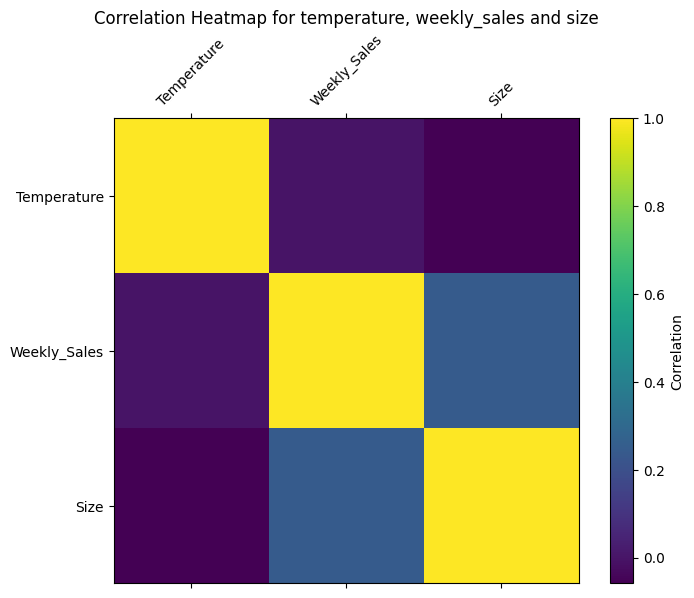

In [49]:
# Creating a heatmap for temperature, weekly_sales and size
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='viridis', fignum=1)
plt.colorbar(label='Correlation')
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=10, rotation=45)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=10)
plt.title('Correlation Heatmap for temperature, weekly_sales and size')
plt.show()

#Second Version (Please check this approach)

In [52]:
# Convert the 'Date' column to a datetime object
merged_data3['Date'] = pd.to_datetime(merged_data3['Date'])

# Calculate monthly average temperature
monthly_avg_temp = merged_data3.groupby(['Store', merged_data3['Date'].dt.to_period('M')])['Temperature'].mean().reset_index()

# Calculate store-level monthly sales
store_monthly_sales = merged_data3.groupby(['Store', merged_data3['Date'].dt.to_period('M')])['Weekly_Sales'].sum().reset_index()

# Calculate store size (assuming it's constant for each store)
store_size = merged_data3[['Store', 'Size']].drop_duplicates()

# Merge the data frames
correlation_data = pd.merge(store_monthly_sales, monthly_avg_temp, on=['Store', 'Date'])
correlation_data = pd.merge(correlation_data, store_size, on='Store')

# Calculate the correlation matrix
correlation_matrix1 = correlation_data[['Temperature', 'Weekly_Sales', 'Size']].corr()
correlation_matrix1

,Temperature,Weekly_Sales,Size
Temperature,1.000000,-0.156393,-0.122614
Weekly_Sales,-0.156393,1.000000,0.686629
Size,-0.122614,0.686629,1.000000


<Figure size 1000x600 with 0 Axes>

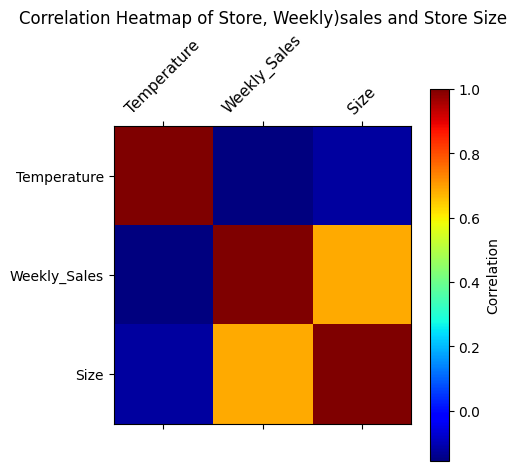

In [53]:
# Plot the correlation matrix
plt.figure(figsize=(10, 6))
plt.matshow(correlation_matrix1, cmap='jet', fignum=2)
plt.colorbar(label='Correlation')
plt.xticks(range(correlation_matrix1.shape[1]), correlation_matrix1.columns, fontsize=11, rotation=45)
plt.yticks(range(correlation_matrix1.shape[0]), correlation_matrix1.columns, fontsize=10)
plt.title('Correlation Heatmap of Store, Weekly)sales and Store Size')
plt.show()